
# <p style="padding:10px;background-color:#0f4d9d;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Sentiment Analysis of Restaurant Reviews"</p>

<center>
<font color='darkblue' size='5'><b>Install Wordcloud</b></font>
</center>

**This line installs the wordcloud library using the pip package manager. The wordcloud library is used to visualize word frequency from text data as a word cloud.**

In [1]:

pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


<center>
<font color='darkblue' size='5'><b>Import Required Libraries and the Dataset into Python </b></font>
</center>

In [2]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('assignment_dataset_A.csv', encoding='Windows-1252')


In [4]:
#Inspect the initial few entries of a DataFrame using head() to get an overview
df.head()

,Reviewer,ReviewTxt
0,1,Wow... Loved this place.
1,2,Crust is not good.
2,3,Not tasty and the texture was just nasty.
3,4,Stopped by during the late May bank holiday of...
4,5,The selection on the menu was great and so wer...


In [5]:
#Checking the dimension of the dataframe
df.shape

(100, 2)


<center>
<font color='darkblue' size='5'><b>1) Sentiment of each review</b></font>
</center>



**This code defines a function to compute sentiment polarity using TextBlob for a given text and then applies this function to the 'ReviewTxt' column of the DataFrame df, storing the results in a new column named 'sentiment**

In [6]:

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['ReviewTxt'].apply(get_sentiment)


In [7]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
df.head(100)

,Reviewer,ReviewTxt,sentiment
0,1,Wow... Loved this place.,0.400000
1,2,Crust is not good.,-0.350000
2,3,Not tasty and the texture was just nasty.,-1.000000
3,4,Stopped by during the late May bank holiday of...,0.200000
4,5,The selection on the menu was great and so wer...,0.800000
5,6,Now I am getting angry and I want my damn pho.,-0.500000
6,7,"Not a Punjabi resturant, their Paneer Butter m...",1.000000
7,8,I ordered this through Zomato ORD#176-678765. ...,0.500000
8,9,This resturant was recommended to me by my fri...,0.350000
9,10,I never heard of this resturant before. Zomato...,0.700000


In [8]:
#To retrieve statistical summary of the sentiment colomn added
df['sentiment'].describe()

count    100.000000
mean       0.169691
std        0.534697
min       -1.000000
25%       -0.115551
50%        0.200000
75%        0.600000
max        1.000000
Name: sentiment, dtype: float64


<center>
<font color='darkblue' size='5'><b>2)Overall Sentiment of the restaurant</b></font>
</center>


**To get the overall sentiment of the restaurant, you can take the average sentiment of all reviews.**

In [9]:

overall_sentiment = df['sentiment'].mean()
print(f"Overall Sentiment of the Restaurant: {overall_sentiment}")

Overall Sentiment of the Restaurant: 0.1696913555194805




<center>
<font color='darkgreen' size='3'><b>Analysing the sentiment score in intervals and the number of reviews associated with each interval. The sentiment score is classified into 4 intervals/bins.</b></font>
</center>


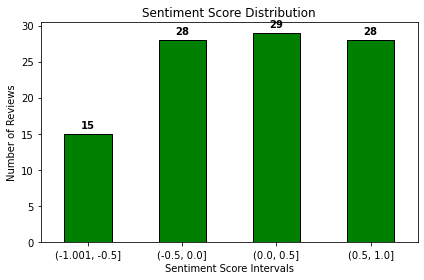

In [10]:
# Define bins for categorization
bins = [-1, -0.5, 0, 0.5, 1]

# Categorize the sentiment scores
df['binned'] = pd.cut(df['sentiment'], bins, right=True, include_lowest=True)

# Count the number of reviews in each bin
bin_counts = df['binned'].value_counts().sort_index()

# Plotting
ax = bin_counts.plot(kind='bar', color='green', edgecolor='black')
for i, v in enumerate(bin_counts):
    ax.text(i, v + 0.5, int(v), ha='center', va='bottom', fontweight='bold')

plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score Intervals')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





<center>
<font color='green' size='3'><b>The graph above shows that comparitively large number of reviews are assosiated with positive sentiments than the negative reviews</b></font>
</center>



 
<center>
<font color='darkyellow' size='5'><b>Word Cloud for Reviews</b></font>
</center>


In [11]:
# Filtering positive and negative reviews based on sentiment
positive_reviews = ' '.join(df[df['sentiment'] > 0.25]['ReviewTxt'].tolist())
negative_reviews = ' '.join(df[df['sentiment'] < -0.25]['ReviewTxt'].tolist())

In [12]:
#View the positive reviews
positive_reviews

"Wow... Loved this place. The selection on the menu was great and so were the prices. Not a Punjabi resturant, their Paneer Butter masala was the best we have had in Pune. I ordered this through Zomato ORD#176-678765. The delivery was slow but the food was incredible. I loved their indian food and rates were also good. This resturant was recommended to me by my friend. It has multiple branches all over Pune. None of their branches have good parking. They don’t offer valet parking I never heard of this resturant before. Zomato recommended me Paneer Butter Masala and it was incredible. I would definitely love to order this again. This resturant is amazing, Their food especially roti with makhan and Paneer Butter Masala Honeslty it didn't taste THAT fresh.) The fries were great too. A great touch. I went with my wife here to this resturant. Their Paneer Butter masala was the best we have had I ordered this through Zomato ORD#176-678765. The delivery was slow but the food was incredible. N

In [13]:
#View the negative reviews
negative_reviews

"Crust is not good. Not tasty and the texture was just nasty. Now I am getting angry and I want my damn pho. This was ordered by me online and the food was pathetic. My order number is ORD#187-709843. Please refund my money. I do not like the Garlic Rice that you sent me. It was horrible and bitter. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was shocked because no signs indicate cash only. This was ordered by me online and the food was pathetic. My order number is ORD#187-788543. Please refund my money. I do not like the Garlic Rice that you sent me. It was horrible and bitter. The worst was the salmon sashimi. Poor service, the waiter made me feel like I was stupid every time he came to the table. Service sucks. Their chinese Garlic Rice was horrible Frozen pucks of disgust, with some of the worst people behind the register. It's too bad the food is so damn generic. We'll never go again. Horrible Garlic Rice It was not good. Ordered online ORD#132-676543. Please re

In [14]:
#Upgraded version for using Wordcloud
#pip install --upgrade pillow



<center>
<font color='green' size='3'><b>A word cloud represents word frequencies by varying font sizes. The larger the word appears in the word cloud, the more frequently it was mentioned in the reviews. Thus, words that appear larger can be indicative of aspects that stood out in the reviews.</b></font>
</center>





<center>
<font color='darkyellow' size='5'><b>Positive Review Word Cloud</b></font>
</center>


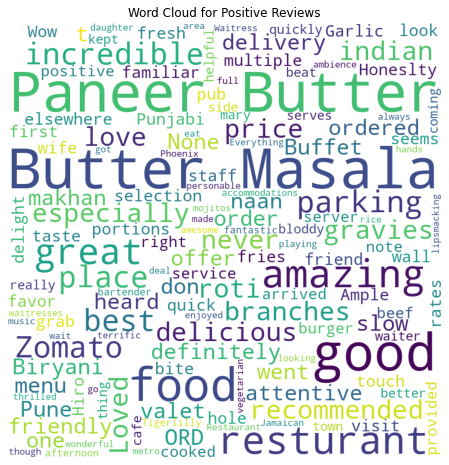

In [15]:
# Creating a word cloud for positive reviews
wordcloud_positive = WordCloud(background_color='white', width=800, height=800).generate(positive_reviews)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()



<font color='darkgreen' size =5> <center><b>Top Selling Foods in Priority:</b> </center></font> <br> <br> 

<div style="text-align: center; color: darkgreen; font-size: 20px;">
<ul style="list-style-position: inside; padding-left: 0;">
    <li><b>Paneer Butter Masala</b></li>
    <li><b>Biriyani</b></li>
     <li><b>Makhan</b></li>

</ul>
</div>



<center>
<font color='darkyellow' size='5'><b>Negative Review Word Cloud</b></font>
</center>


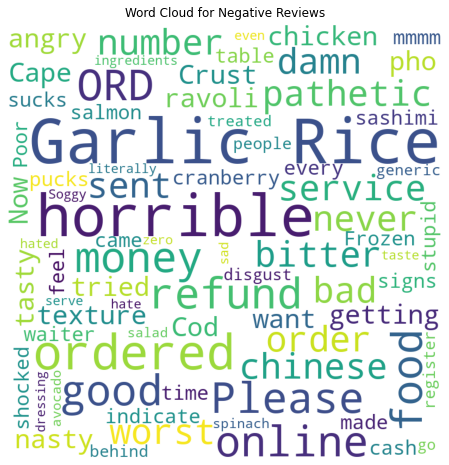

In [16]:

# Creating a word cloud for negative reviews
wordcloud_negative = WordCloud(background_color='white', width=800, height=800).generate(negative_reviews)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

<font color='darkgreen' size =5> <center><b>Worst Selling Foods in Priority:</b> </center></font> <br> <br> 

<div style="text-align: center; color: darkgreen; font-size: 20px;">
<ul style="list-style-position: inside; padding-left: 0;">
    <li><b>Garlic Rice</b></li>
    <li><b>Chinese</b></li>
     <li><b>Ravoli</b></li>

</ul>
</div>

<font size=5> <center> ---------------------------***---------------------------</center>